In [199]:
import pandas as pd
import numpy as np
org_dataset=pd.read_csv("hw1-data.csv")
y=org_dataset["y"].values
dataset=org_dataset.iloc[:,0:org_dataset.shape[1]-1].values

In [200]:
def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size (num_instances, num_features)
        test  - test set, a 2D numpy array of size (num_instances, num_features)
    Returns:
        train_normalized - training set after normalization
        test_normalized  - test set after normalization

    """
    
    feature_max=np.amax(train,axis=0)
    feature_min=np.amin(train,axis=0)
    diff=feature_max-feature_min
    index=np.where(diff==0)
    train_new=np.delete(train,index,axis=1)
    test_new=np.delete(test,index,axis=1)
    feature_max_new=np.amax(train_new,axis=0)
    feature_min_new=np.amin(train_new,axis=0)
    train_normalized=(train_new-feature_min_new)/(feature_max_new-feature_min_new)
    test_normalized=(test_new-feature_min_new)/(feature_max_new-feature_min_new)
    
 
    return train_normalized,test_normalized

In [201]:
X_train=dataset[:100]
X_test=dataset[100:]
train_normalized=feature_normalization(X_train,X_test)[0]
print(train_normalized.shape[1])
test_normalized=feature_normalization(X_train,X_test)[1]
print(test_normalized.shape[1])

39
39


In [202]:
y_train=y[:100]
y_test=y[100:]

In [32]:
def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the square loss for predicting y with X*theta
    
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D array of size (num_features)
    
    Returns:
        loss - the square loss, scalar
    """
    loss = 0 #initialize the square_loss
    num_obs=X.shape[0]
    pred=np.dot(X,theta)
    bias=pred-y
    loss=np.dot(bias,bias)/num_obs 
    return loss
    

In [33]:
def compute_square_loss_gradient(X, y, theta):
    pred=np.dot(X,theta)
    num_obs=X.shape[0]
    trans_X=X.T
    bias=pred-y
    grad=(2.0/num_obs)*np.dot(trans_X,bias)
    
    return grad

In [34]:
print(compute_square_loss(train_normalized,y_train, theta=np.zeros(train_normalized.shape[1])))
print(len(compute_square_loss_gradient(train_normalized,y_train, theta=np.zeros(train_normalized.shape[1]))))

5.633551622621556
43


In [99]:

def batch_grad_descent(X, y, alpha=0.1, num_iter=1000, check_gradient=False):
    """
    In this question you will implement batch gradient descent to
    minimize the square loss objective
    
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        num_iter - number of iterations to run 
        check_gradient - a boolean value indicating whether checking the gradient when updating
        
    Returns:
        theta_hist - store the the history of parameter vector in iteration, 2D numpy array of size (num_iter+1, num_features) 
                    for instance, theta in iteration 0 should be theta_hist[0], theta in ieration (num_iter) is theta_hist[-1]
        loss_hist - the history of objective function vector, 1D numpy array of size (num_iter+1) 
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_iter+1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_iter+1) #initialize loss_hist
    theta = np.ones(num_features) #initialize theta
    #TODO
    for i in range(num_iter+1):
        theta_hist[i]=theta
        loss_hist[i]=compute_square_loss(X,y,theta_hist[i])   
        theta=theta_hist[i]-alpha*compute_square_loss_gradient(X,y,theta_hist[i])
    
    return theta_hist, loss_hist
    
    

####################################
###Q2.4b: Implement backtracking line search in batch_gradient_descent
###Check http://en.wikipedia.org/wiki/Backtracking_line_search for details
#TODO



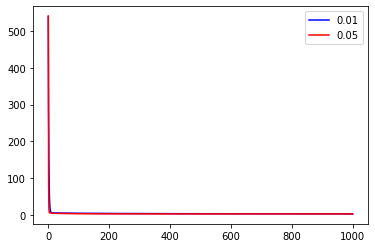

In [122]:
import matplotlib.pyplot as plt
step_size=[0.01,0.05,0.1,0.5]
loss_history=[]
for i in step_size:
    loss_history.append(batch_grad_descent(train_normalized,y_train,alpha=i,num_iter=1000,check_gradient=False)[1])
plt.plot(range(1001),loss_history[0],'b-',label=step_size[0])
plt.plot(range(1001),loss_history[1],'r-',label=step_size[1])
plt.legend(loc='best')
plt.show()

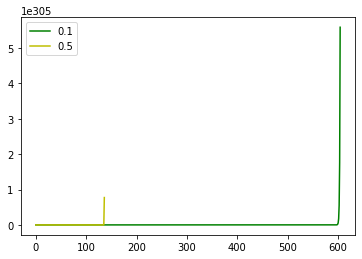

In [123]:
plt.plot(range(1001),loss_history[2],'g-',label=step_size[2])
plt.plot(range(1001),loss_history[3],'y-',label=step_size[3])
plt.legend(loc='best')
plt.show()

In [125]:
### Compute the gradient of Regularized Batch Gradient Descent
def compute_regularized_square_loss(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized square loss function given X, y and theta
    
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        lambda_reg - the regularization coefficient
    
    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    loss = 0 #initialize the square_loss
    num_obs=X.shape[0]
    pred=np.dot(X,theta)
    bias=pred-y
    loss=np.dot(bias,bias)/num_obs+lambda_reg*np.dot(theta,theta)
    return loss
    






In [126]:
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized square loss function given X, y and theta
    
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        lambda_reg - the regularization coefficient
    
    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    pred=np.dot(X,theta)
    num_obs=X.shape[0]
    trans_X=X.T
    bias=pred-y
    grad=(2.0/num_obs)*np.dot(trans_X,bias)+2.0*lambda_reg*theta
    return grad
    

In [149]:
def regularized_grad_descent(X, y, alpha=0.01, lambda_reg=1, num_iter=1000):
    """
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        lambda_reg - the regularization coefficient
        numIter - number of iterations to run 
        
    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_iter+1, num_features) 
        loss_hist - the history of regularized loss value, 1D numpy array
    """
    (num_instances, num_features) = X.shape
    theta = np.ones(num_features) #Initialize theta
    theta_hist = np.zeros((num_iter+1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_iter+1) #Initialize loss_hist
    #TODO
    
#############################################
## Visualization of Regularized Batch Gradient Descent
##X-axis: log(lambda_reg)
##Y-axis: square_loss
    for i in range(num_iter+1):
        theta_hist[i]=theta
        loss_hist[i]=compute_regularized_square_loss(X, y, theta, lambda_reg)   
        theta=theta_hist[i]-alpha*compute_regularized_square_loss_gradient(X, y, theta, lambda_reg)
    
    return theta_hist, loss_hist







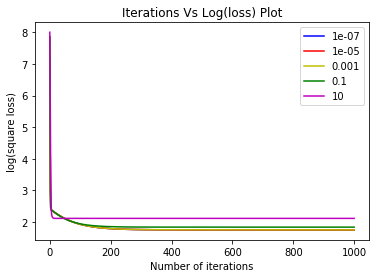

In [179]:
lambda_set=[10**i for i in range(-7,3,2)]
test_loss=[]
train_loss=[]
for i in lambda_set:
    test_loss.append(regularized_grad_descent(test_normalized, y_test, alpha=0.01, lambda_reg=i, num_iter=1000)[1])
    train_loss.append(regularized_grad_descent(train_normalized, y_train, alpha=0.01, lambda_reg=i, num_iter=1000)[1])
    
color_set=['b-','r-','y-','g-','m-']
for i in range(5):
    plt.plot(range(1001),np.log(test_loss[i]),color_set[i],label=lambda_set[i])
    plt.legend(loc='best')
    

plt.ylabel('log(square loss)')
plt.xlabel('Number of iterations')  
plt.title("Iterations Vs Log(loss) Plot")
plt.show()    


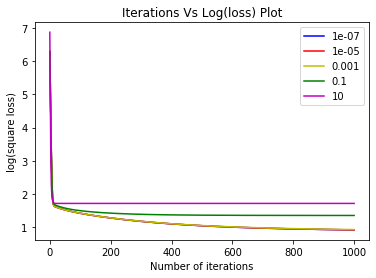

In [180]:
lambda_set=[10**i for i in range(-7,3,2)]
test_loss=[]
train_loss=[]
for i in lambda_set:
    test_loss.append(regularized_grad_descent(test_normalized, y_test, alpha=0.01, lambda_reg=i, num_iter=1000)[1])
    train_loss.append(regularized_grad_descent(train_normalized, y_train, alpha=0.01, lambda_reg=i, num_iter=1000)[1])
    
color_set=['b-','r-','y-','g-','m-']
for i in range(5):
    plt.plot(range(1001),np.log(train_loss[i]),color_set[i],label=lambda_set[i])
    plt.legend(loc='best')
    

plt.ylabel('log(square loss)')
plt.xlabel('Number of iterations')  
plt.title("Iterations Vs Log(loss) Plot")
plt.show()    

In [76]:
def stochastic_compute_regularized_square_loss(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized square loss function given X, y and theta
    
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        lambda_reg - the regularization coefficient
    
    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    loss = 0 #initialize the square_loss
    num_obs=X.shape[0]
    pred=np.dot(X,theta)
    bias=pred-y
    loss=np.dot(bias,bias)+lambda_reg*np.dot(theta,theta)
    return loss
    

In [77]:
def stochastic_compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized square loss function given X, y and theta
    
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        lambda_reg - the regularization coefficient
    
    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    pred=np.dot(X,theta)
    num_obs=X.shape[0]
    trans_X=X.T
    bias=pred-y
    grad=2.0*np.dot(trans_X,bias)+2.0*lambda_reg*theta
    return grad

In [206]:
### Stochastic Gradient Descent
def stochastic_grad_descent(X, y, alpha=0.005, lambda_reg=10**-2, num_iter=1000,c=0.1):
    """
    In this question you will implement stochastic gradient descent with a regularization term
    
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - string or float. step size in gradient descent
                NOTE: In SGD, it's not always a good idea to use a fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every iteration is alpha.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t)
                if alpha == "1/t", alpha = 1/t
        lambda_reg - the regularization coefficient
        num_iter - number of epochs (i.e number of times) to go through the whole training set
    
    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size (num_iter, num_instances, num_features) 
        loss hist - the history of regularized loss function vector, 2D numpy array of size(num_iter, num_instances)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta
    
    
    theta_hist = np.zeros((num_iter, num_instances, num_features))  #Initialize theta_hist
    loss_hist = np.zeros((num_iter, num_instances)) #Initialize loss_hist
    
    s=np.arange(num_instances)
    np.random.shuffle(s)
    X=X[s]
    y=y[s]
    for i in range(num_iter):
        for j in range(num_instances):
            if alpha=='c/sqrt(t)':
                step_size=c/np.sqrt(i*j+1.0)
            elif alpha=='c/t':
                step_size=c/(i*j+1.0)
            else:
                step_size=alpha
                
          ##  theta_hist[i][j]=theta
          ##  pred=np.dot(X[j],theta)
          ##  f=np.dot(pred-y[j],pred-y[j])+lambda_reg*np.dot(theta,theta)
          ##  loss_hist[i][j]=f+loss_hist[i][j-1]
          ##  gradient=2*np.dot(pred-y[j],X[j])+2*lambda_reg*theta
          ##  theta=theta-step_size*gradient
            
            theta_hist[i][j]=theta
            loss_hist[i][j]=loss_hist[i][j-1]+stochastic_compute_regularized_square_loss(X[j], y[j], theta, lambda_reg)
            gradient=stochastic_compute_regularized_square_loss_gradient(X[j], y[j], theta, lambda_reg)
            theta=theta_hist[i][j]-step_size*gradient
            
            
    return theta_hist, loss_hist            

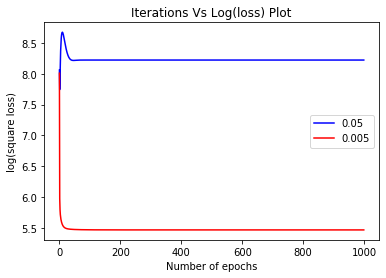

In [207]:
import matplotlib.pyplot as plt
first_loss=stochastic_grad_descent(train_normalized, y_train, alpha=0.05, lambda_reg=10**-2, num_iter=1000,c=0.1)[1]
first_loss=[first_loss[i][-1] for i in range(len(first_loss))]
second_loss=stochastic_grad_descent(train_normalized, y_train, alpha=0.005, lambda_reg=10**-2, num_iter=1000,c=0.1)[1]
second_loss=[second_loss[i][-1] for i in range(len(second_loss))]
train_loss=[first_loss,second_loss]
color_set=['b-','r-']
step_set=[0.05,0.005]
for i in range(2):
    plt.plot(range(1000),np.log(train_loss[i]),color_set[i],label=step_set[i])
    plt.legend(loc='best')
    

plt.ylabel('log(square loss)')
plt.xlabel('Number of epochs')  
plt.title("Iterations Vs Log(loss) Plot")
plt.show()  

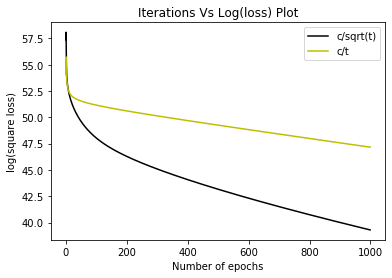

In [211]:
import matplotlib.pyplot as plt
third_loss=stochastic_grad_descent(train_normalized, y_train, alpha='c/sqrt(t)', lambda_reg=10**-2, num_iter=1000,c=0.1)[1]
third_loss=[third_loss[i][-1] for i in range(len(third_loss))]
fourth_loss=stochastic_grad_descent(train_normalized, y_train, alpha='c/t', lambda_reg=10**-2, num_iter=1000,c=0.1)[1]
fourth_loss=[fourth_loss[i][-1] for i in range(len(fourth_loss))]
adj_train_loss=[third_loss,fourth_loss]
color_set=['k-','y-']
step_set=['c/sqrt(t)','c/t']
for i in range(2):
    plt.plot(range(1000),np.log(adj_train_loss[i]),color_set[i],label=step_set[i])
    plt.legend(loc='best')
    

plt.ylabel('log(square loss)')
plt.xlabel('Number of epochs')  
plt.title("Iterations Vs Log(loss) Plot")
plt.show()  